<img src="https://miro.medium.com/v2/resize:fit:2000/1*EIrogB4JojUji63tC3p23A.png" width="1800">

<div style="border-radius:12px; padding: 20px; background-color:; font-size:100%; text-align:left">

<h2 align="left"><font color=#008B8B>CIFAR-10 Dataset</font></h2>

In [47]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense, Input
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


<div style="border-radius:12px; padding: 20px; background-color: #E0FFFF; font-size:120%; text-align:left">
Data Preparation and Exploration



In [48]:
#Load the CIFAR-10 dataset from Keras library:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [49]:
#Split original training data to training and validation sets:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [50]:
print('Train Images Shape:      ', X_train.shape)
print('Train Labels Shape:      ', y_train.shape)

print('\nValidation Images Shape: ', X_valid.shape)
print('Validation Labels Shape: ', y_valid.shape)

print('\nTest Images Shape:       ', X_test.shape)
print('Test Labels Shape:       ', y_test.shape)

Train Images Shape:       (45000, 32, 32, 3)
Train Labels Shape:       (45000, 1)

Validation Images Shape:  (5000, 32, 32, 3)
Validation Labels Shape:  (5000, 1)

Test Images Shape:        (10000, 32, 32, 3)
Test Labels Shape:        (10000, 1)


<div style="border-radius:12px; padding: 20px; background-color:#E0FFFF; font-size:120%; text-align:left">
Data Preprocessing; Normalization of Image Data


In [51]:
# Convert pixel values data type to float32
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
X_valid = X_valid.astype('float32')

# Calculate the mean and standard deviation of the training images
mean = np.mean(X_train)
std  = np.std(X_train)

# Normalize the data
X_train = (X_train-mean)/(std+3e-5)
X_test  = (X_test-mean) /(std+3e-5)
X_valid = (X_valid-mean)/(std+3e-5)

<div style="border-radius:12px; padding: 20px; background-color: #E0FFFF; font-size:120%; text-align:left">
One-Hot Encoding of Labels;

In [52]:
y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)
y_test  = to_categorical(y_test, 10)

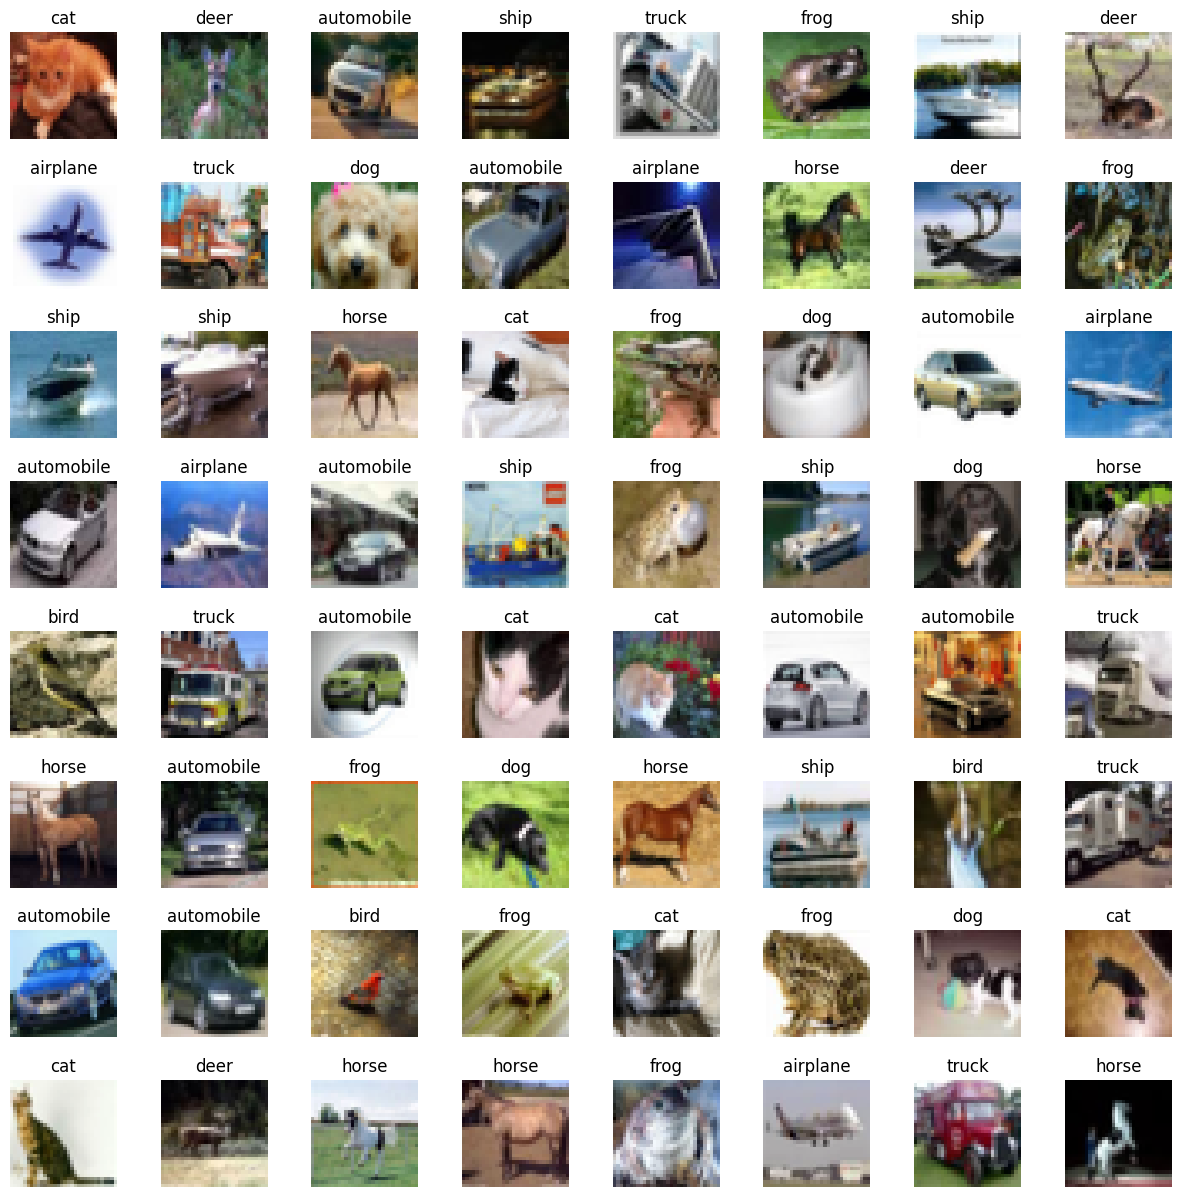

In [53]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def visualize_random_data(data, labels, num_rows=8, num_cols=8):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i in range(num_rows):
        for j in range(num_cols):
            index = np.random.randint(len(data))
            img = data[index]
            img = (img - np.min(img)) / (np.max(img) - np.min(img))
            axes[i, j].imshow(img)
            label = np.argmax(labels[index])
            axes[i, j].set_title(class_names[label], fontsize=12)
            axes[i, j].axis("off")

    plt.show()
visualize_random_data(X_train, y_train)

<div style="border-radius:12px; padding: 20px; background-color: #E0FFFF; font-size:120%; text-align:left">
Data Augmentation

In [54]:
data_generator = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.12,
    height_shift_range=0.12,
    horizontal_flip=True,
    zoom_range=0.1,
    brightness_range=[0.9, 1.1],
    shear_range=10,
    channel_shift_range=0.1,)

<div style="border-radius:12px; padding: 20px; background-color: #E0FFFF; font-size:120%; text-align:left">
Displaying Category Distribution

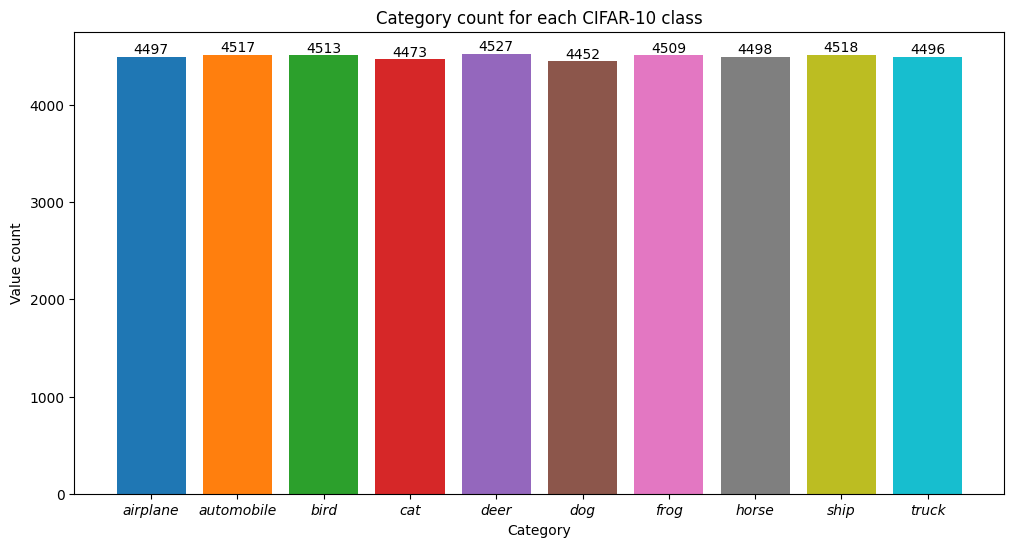

In [55]:
unique_labels = np.unique(np.argmax(y_train, axis=1))
category_counts = {i: np.sum(np.argmax(y_train, axis=1) == i) for i in range(len(class_names))}
category_counts = {class_names[i]: count for i, count in category_counts.items()}

colors = plt.get_cmap('tab10', len(category_counts))

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(category_counts)), category_counts.values(), color=colors(range(len(category_counts))))

plt.title("Category count for each CIFAR-10 class")
plt.xlabel("Category")
plt.ylabel("Value count")
plt.xticks(range(len(category_counts)), category_counts.keys(), rotation=0, fontstyle='italic')

for bar in bars:
    yval = bar.get_height()
    xval = bar.get_x() + bar.get_width() / 2.0
    plt.text(xval, yval, int(yval), ha='center', va='bottom')
plt.show()

<div style="border-radius:12px; padding: 20px; background-color: #E0FFFF; font-size:120%; text-align:left">
CNN Model Architecture

In [57]:
model = Sequential()
model.add(Input(shape=(32, 32, 3)))
weight_decay = 0.0001
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', 
                 kernel_regularizer=l2(weight_decay), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', 
                 kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', 
                 kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 114,634 (447.79 KB)

 Trainable params: 114,186 (446.04 KB)

 Non-trainable params: 448 (1.75 KB)

<div style="border-radius:12px; padding: 20px; background-color: #F5FFFA; font-size:120%; text-align:left">
Training the CNN Model

In [58]:
data_generator = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False)
data_generator.fit(X_train)

In [61]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.3656 - loss: 2.1155 - val_accuracy: 0.5512 - val_loss: 1.2827
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 65s 46ms/step - accuracy: 0.5539 - loss: 1.3076 - val_accuracy: 0.6138 - val_loss: 1.1202
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 65s 46ms/step - accuracy: 0.6247 - loss: 1.1020 - val_accuracy: 0.6670 - val_loss: 0.9567
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 65s 46ms/step - accuracy: 0.6717 - loss: 0.9730 - val_accuracy: 0.6998 - val_loss: 0.8885
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 65s 46ms/step - accuracy: 0.6951 - loss: 0.8963 - val_accuracy: 0.7308 - val_loss: 0.7993
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.7112 - loss: 0.8583 - val_accuracy: 0.7116 - val_loss: 0.8614
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 69s 49ms/step - accuracy: 0.7251 - loss: 0.8141 - val_accuracy: 0.7318 - val_loss: 0.8178
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 71s 50ms/step - accuracy: 0.7417 -

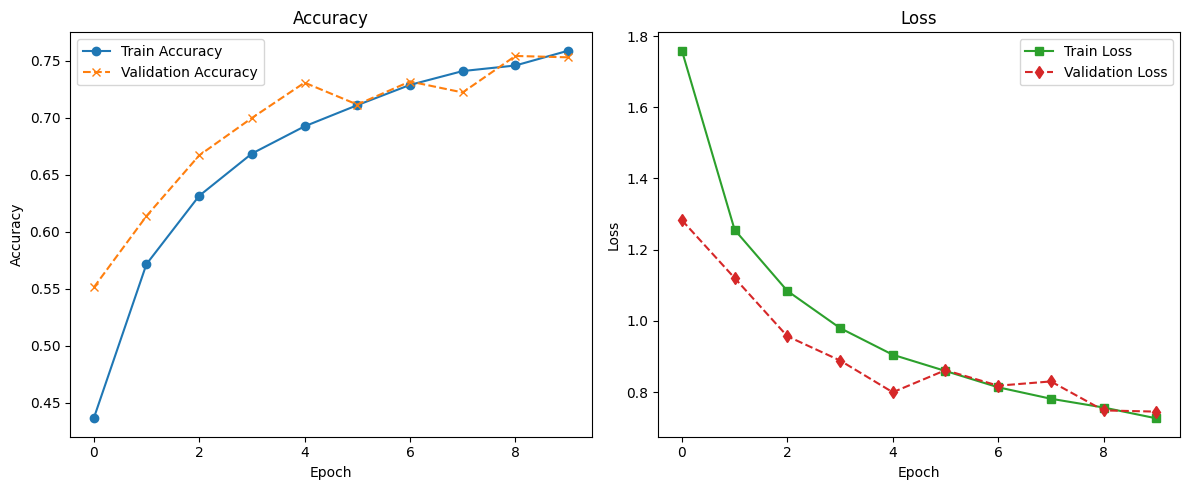

In [62]:
plt.figure(figsize=(12, 5))
# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='#1f77b4', linestyle='-', marker='o')  # Blue
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='#ff7f0e', linestyle='--', marker='x')  # Orange
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='#2ca02c', linestyle='-', marker='s')  # Green
plt.plot(history.history['val_loss'], label='Validation Loss', color='#d62728', linestyle='--', marker='d')  # Red
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [63]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7608 - loss: 0.7424

Test Accuracy: 0.7612000107765198
Test Loss:     0.7461823225021362


<div style="border-radius:12px; padding: 20px; background-color:#E0FFFF ; font-size:120%; text-align:left">
Evaluating the Optimal Model on Test Data; Performance on an Out-of-Dataset Image

In [85]:
url = "https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/09151144/Alaskan-Malamute-standing-in-the-grass1-400x267.jpg"
headers = {'User-Agent': 'Mozilla/5.0'}
req = urllib.request.Request(url, headers=headers)
resp = urllib.request.urlopen(req)
image_data = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image_data, cv2.IMREAD_UNCHANGED)

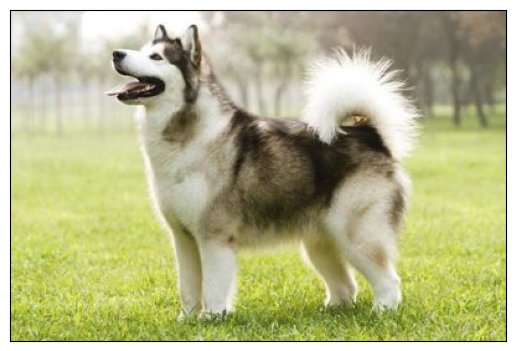

In [86]:
# Convert the image from BGR to RGB: preprocess it in the same way as we did with the training and test data:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Display the image
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [87]:
image = cv2.resize(image, (32,32))

image = (image-mean)/(std+3e-5)

image = image.reshape((1, 32, 32, 3))

In [88]:
prediction = model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [89]:
#The prediction will be a 10-element probability vector. To get the predicted class, we find the index with the maximum value:
predicted_class = prediction.argmax()

print('Predicted class: ', class_names[predicted_class])

Predicted class:  dog


In [74]:
#Test 2 
url = "https://cloudfront.slrlounge.com/wp-content/uploads/2015/02/untitled-2.jpg"
headers = {'User-Agent': 'Mozilla/5.0'}
req = urllib.request.Request(url, headers=headers)
resp = urllib.request.urlopen(req)
image_data = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image_data, cv2.IMREAD_UNCHANGED)

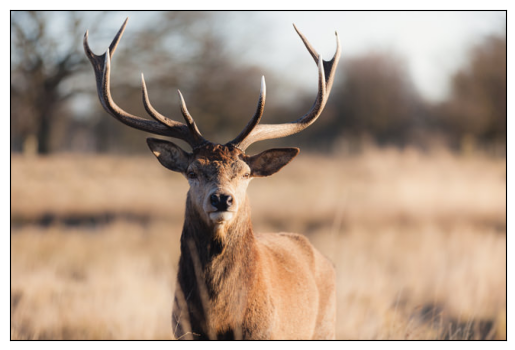

In [75]:
# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Display the image
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [76]:
image = cv2.resize(image, (32,32))

image = (image-mean)/(std+3e-5)

image = image.reshape((1, 32, 32, 3))

In [77]:
prediction = model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [78]:
predicted_class = prediction.argmax()

print('Predicted class: ', class_names[predicted_class])

Predicted class:  deer


<h2 align="left"><font color='#20B2AA'>Thank You!</font></h2>